In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn

In [3]:
%load_ext autoreload
%aimport pipeline
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
pn.log_.level = 3
PL = pipeline.PipeLine(data_dir='/Users/christophemorisset/DATA/MUSE_Jorge/hektor_fits/ngc6778_maps/ngc6778_long_maps',
                       name = 'ngc6778_MUSE_',
                       error_str='_error')
PL_al = pipeline.PipeLine(data_dir='/Users/christophemorisset/DATA/MUSE_Jorge/hektor_fits/ngc6778_maps/ngc6778_long_maps',
                       name = 'ngc6778_MUSE_',
                       error_str='_error_alfalike')

warng EmissionLine: Atom N2r not valid
warng EmissionLine: line 4649A for atom O2r not valid
warng EmissionLine: line 4662A for atom O2r not valid
warng EmissionLine: Atom C2r not valid
warng EmissionLine: Atom N2r not valid
warng EmissionLine: Atom N2r not valid
warng EmissionLine: line 6461A for atom C2 not valid
warng EmissionLine: line 7004A for atom O4 not valid
warng EmissionLine: line 7005A for atom Ne5 not valid
warng EmissionLine: Atom O1r not valid
warng EmissionLine: Atom O1r not valid
warng EmissionLine: Atom O1r not valid
warng EmissionLine: line 8733A for atom He1r not valid
warng EmissionLine: line 8750A for atom H1r not valid
warng EmissionLine: Atom N2r not valid
warng EmissionLine: line 4649A for atom O2r not valid
warng EmissionLine: line 4662A for atom O2r not valid
warng EmissionLine: Atom C2r not valid
warng EmissionLine: Atom N2r not valid
warng EmissionLine: Atom N2r not valid
warng EmissionLine: line 6461A for atom C2 not valid
warng EmissionLine: line 7004A fo

In [9]:
dic = PL.obs.getError(returnObs=True)
dic_alfa = PL_al.obs.getError(returnObs=True)

/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:195: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(subplot_kw={'projection': self.wcs}, figsize=(8,8))


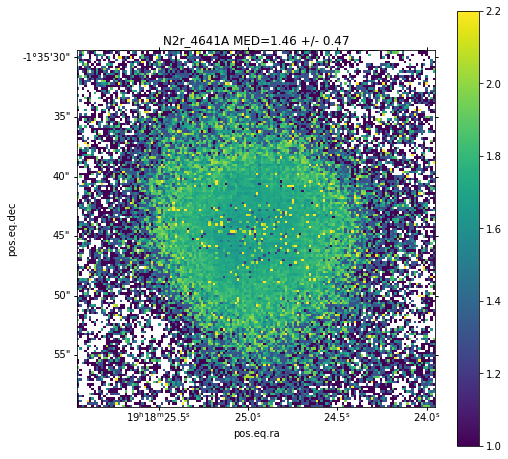

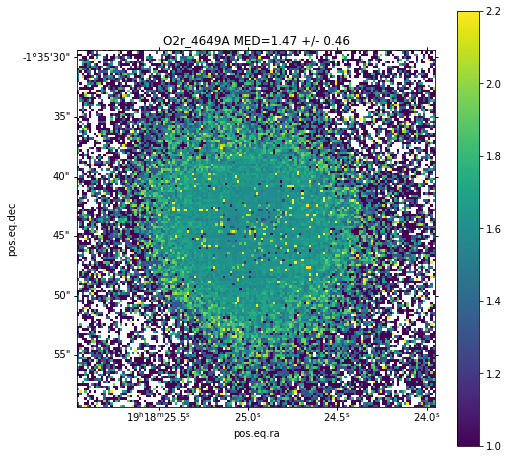

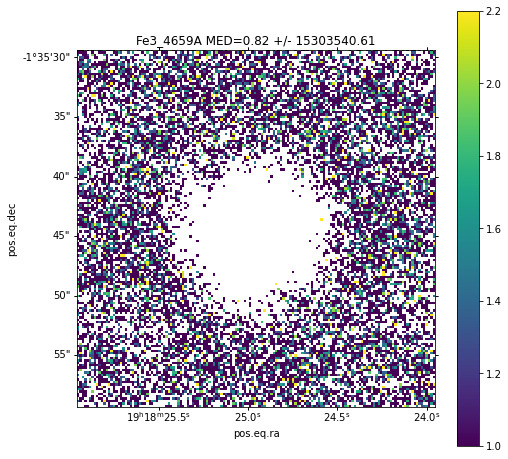

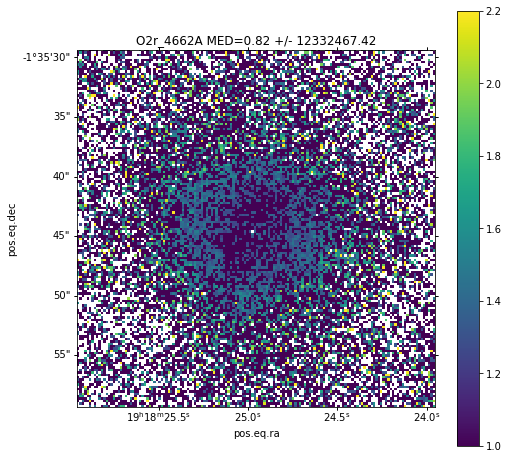

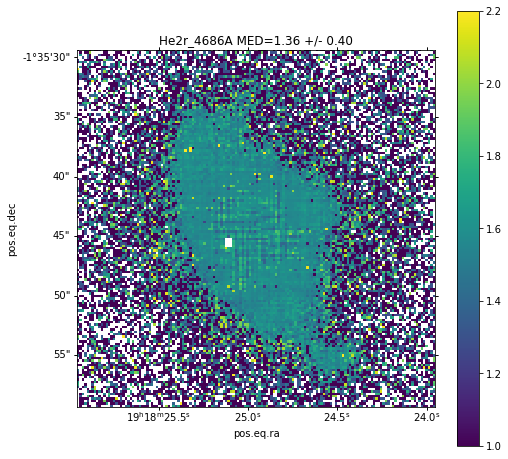

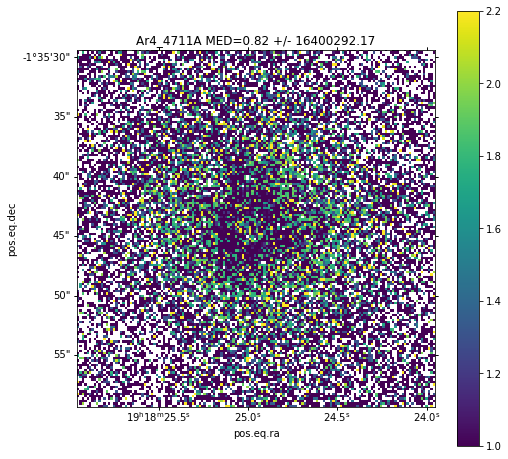

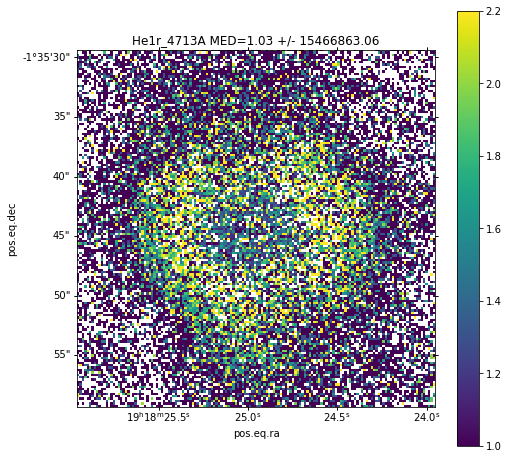

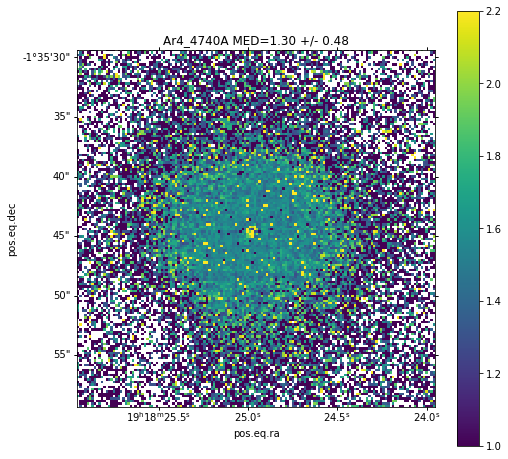

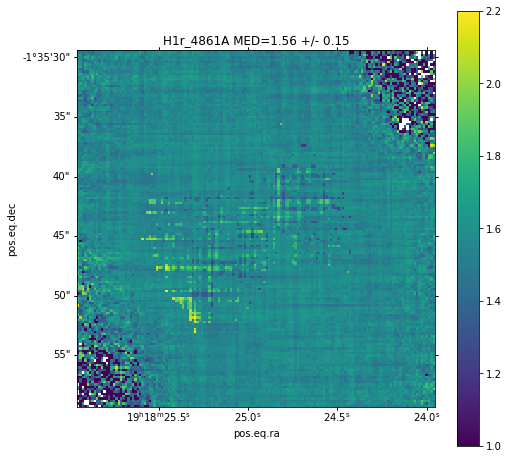

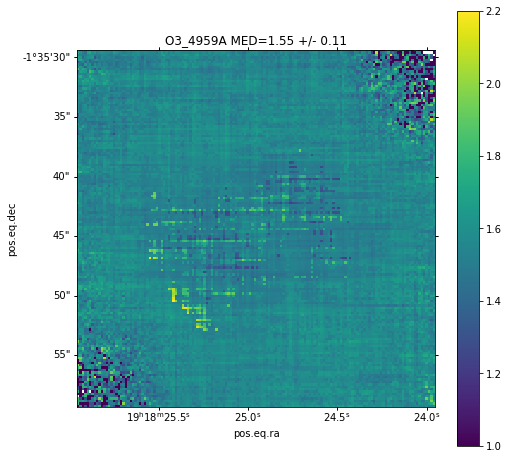

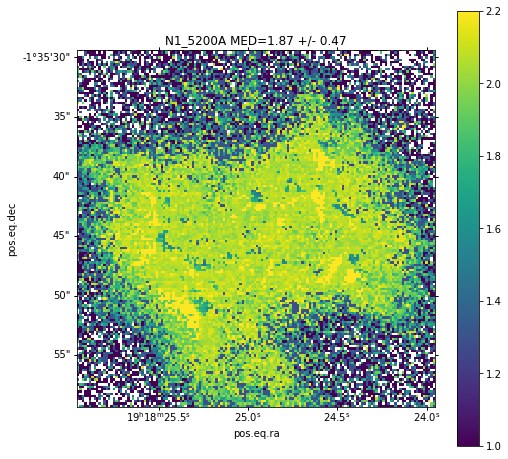

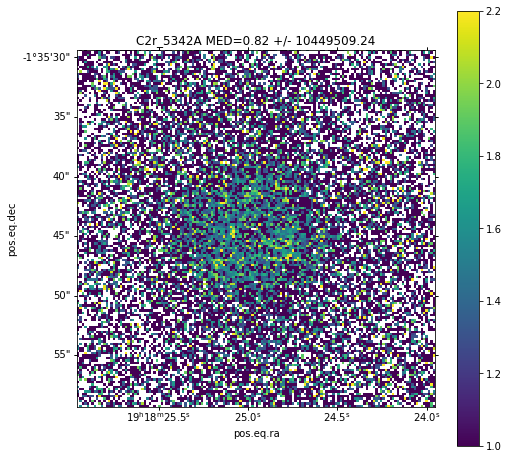

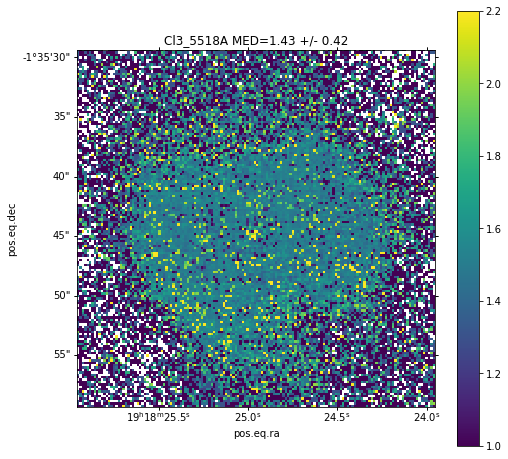

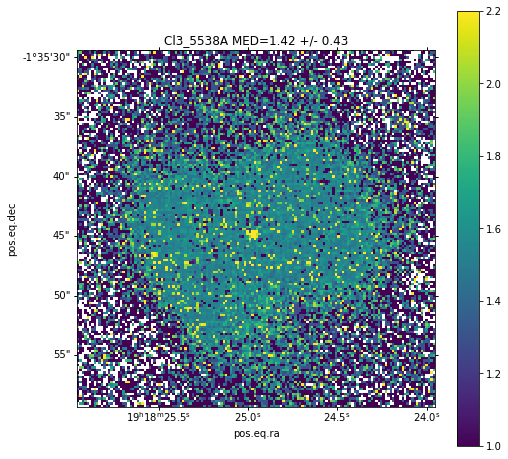

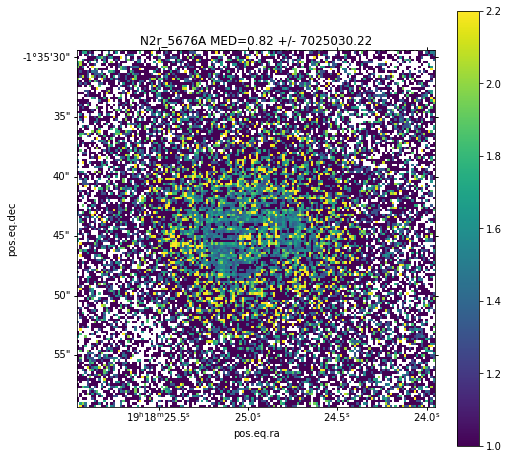

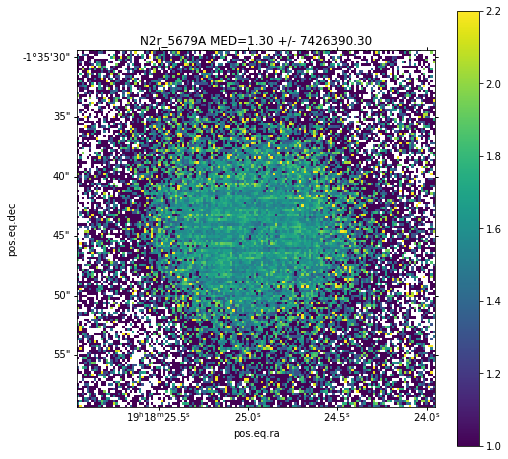

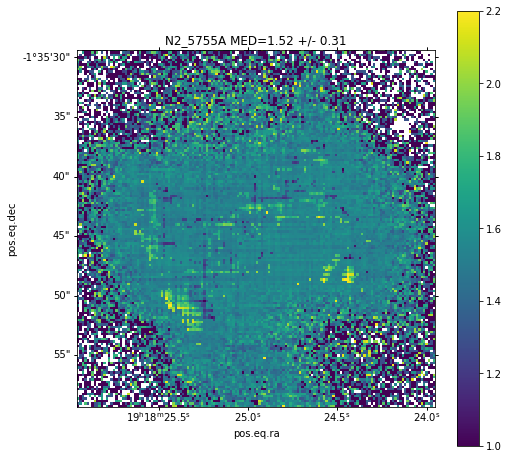

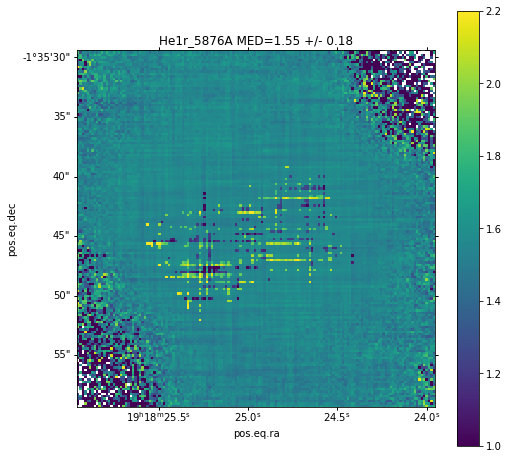

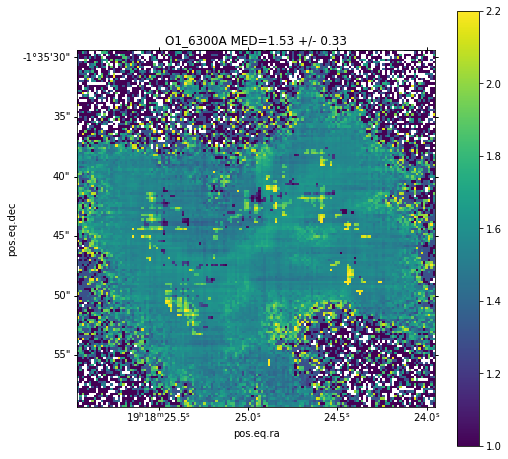

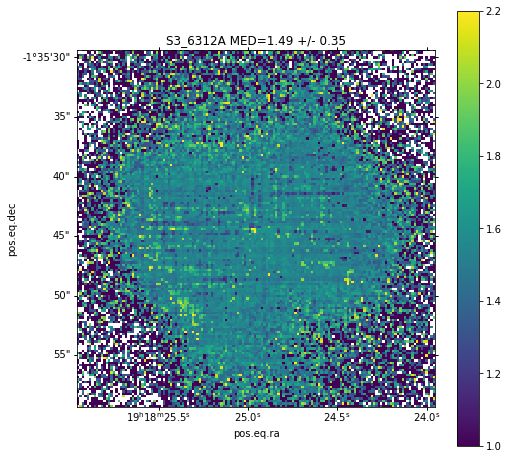

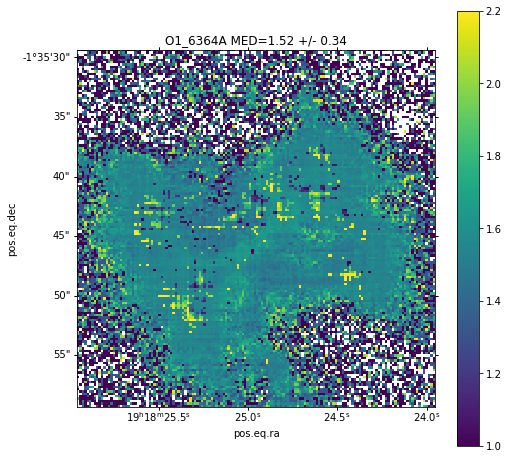

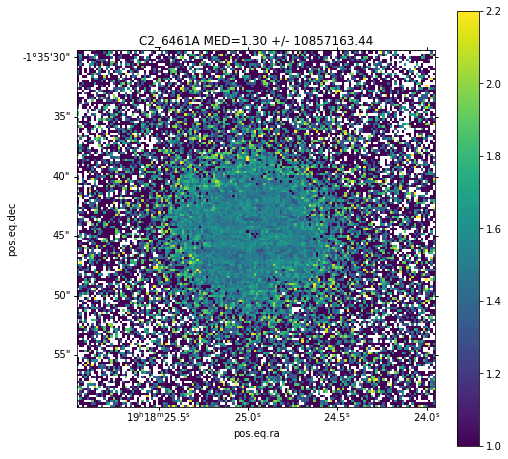

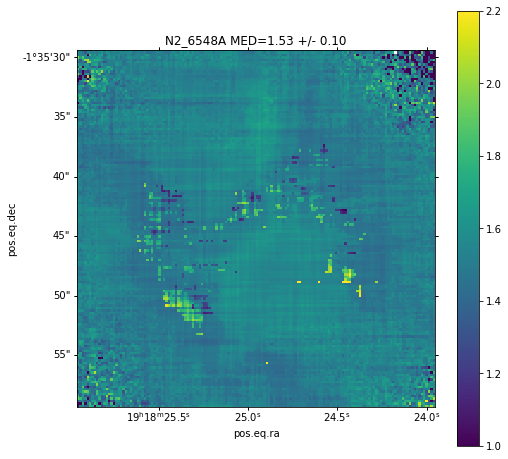

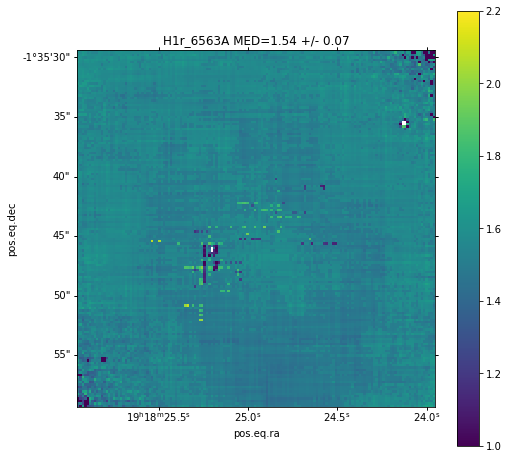

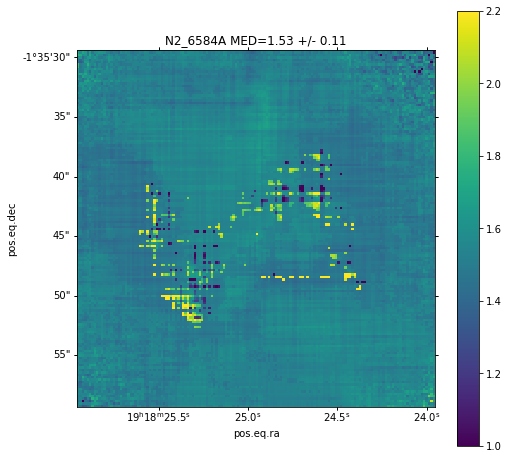

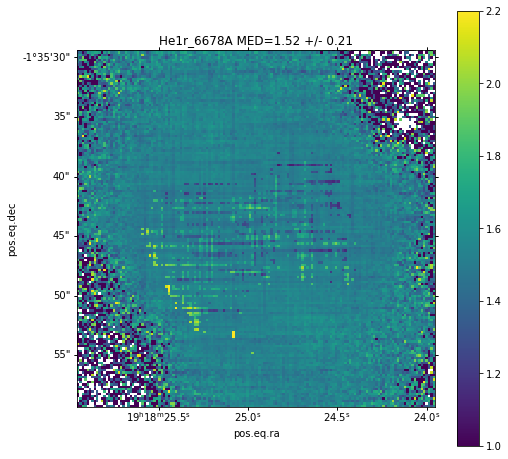

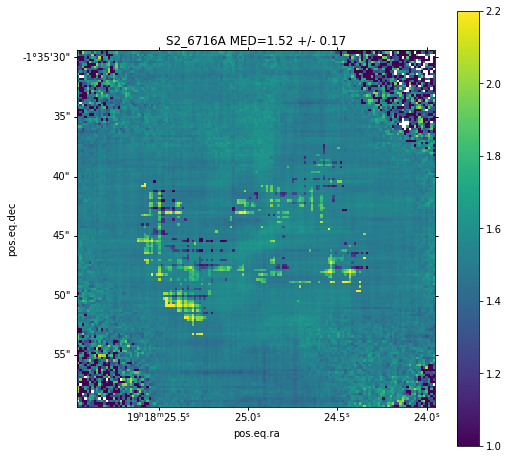

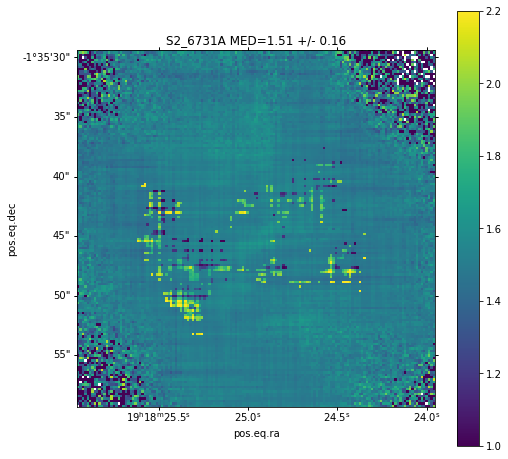

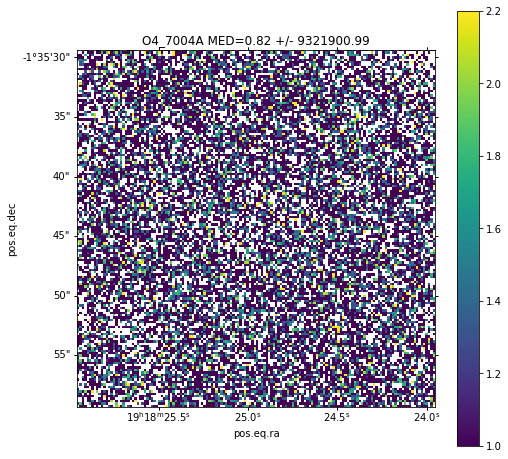

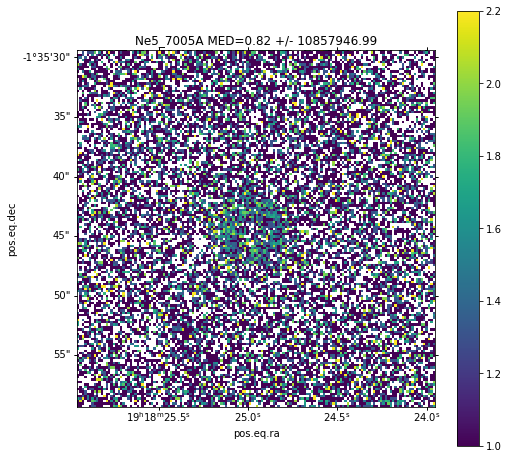

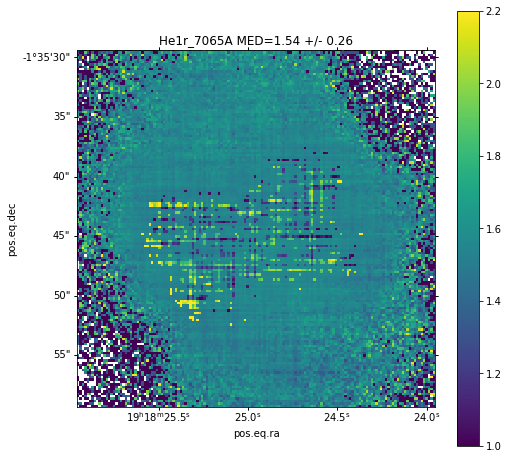

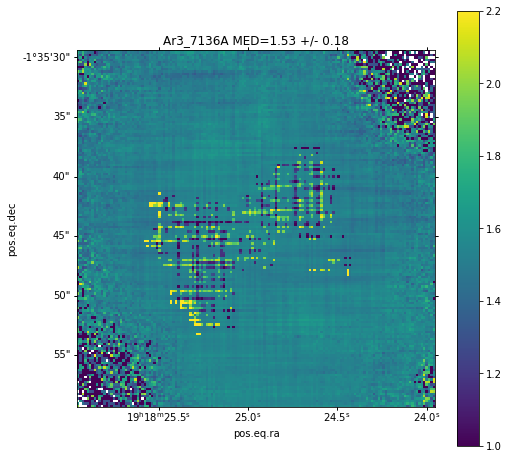

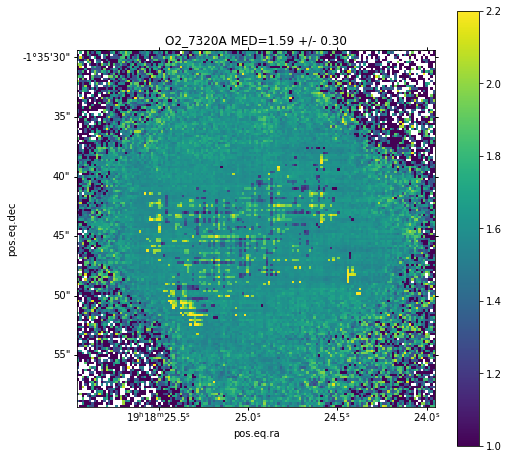

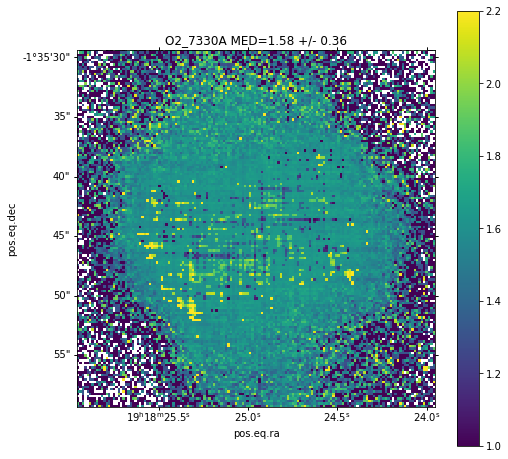

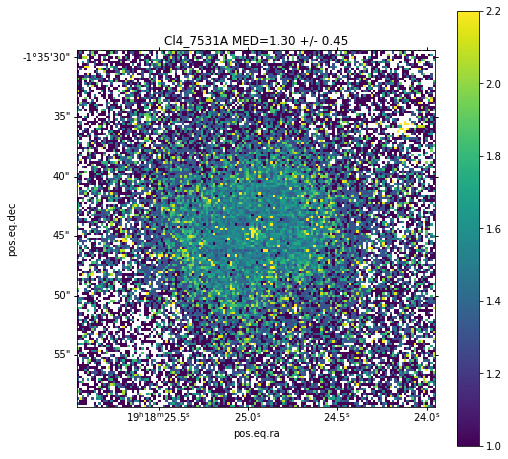

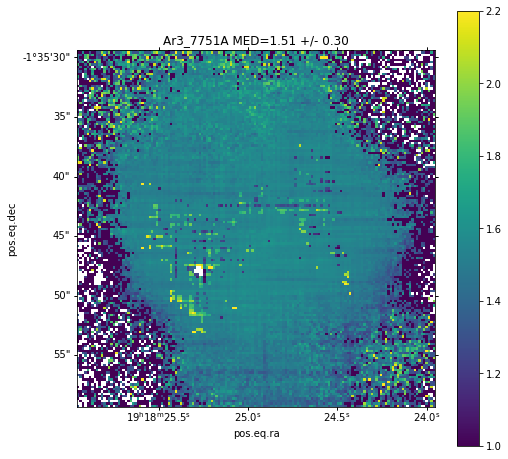

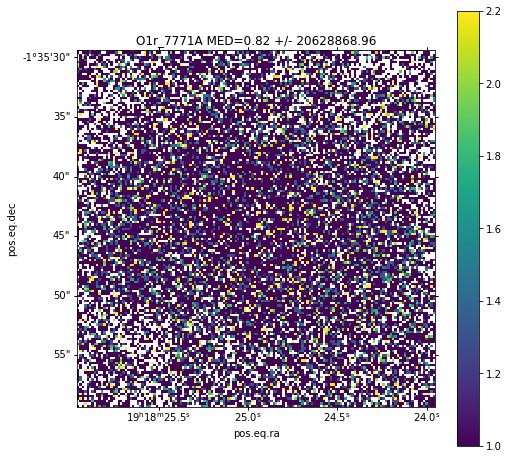

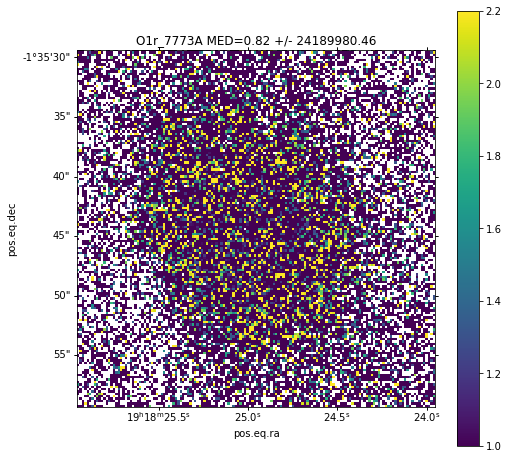

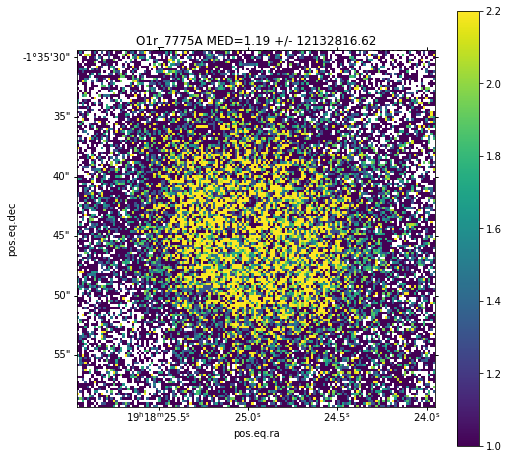

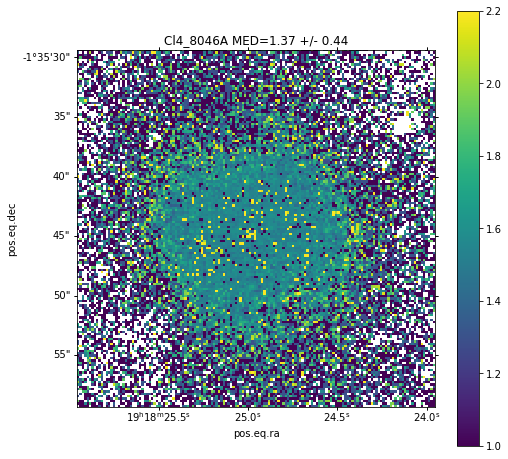

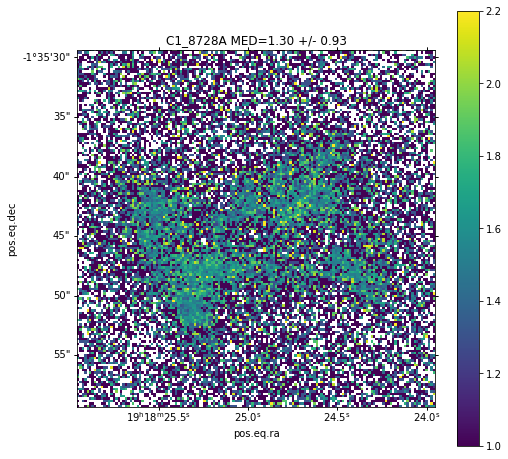

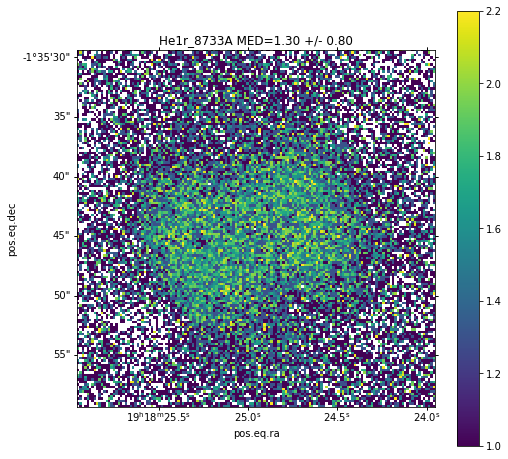

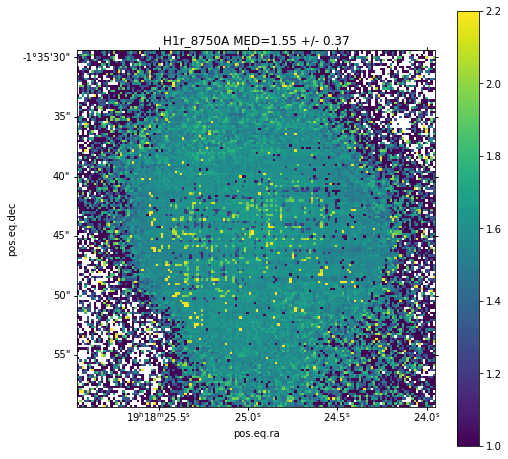

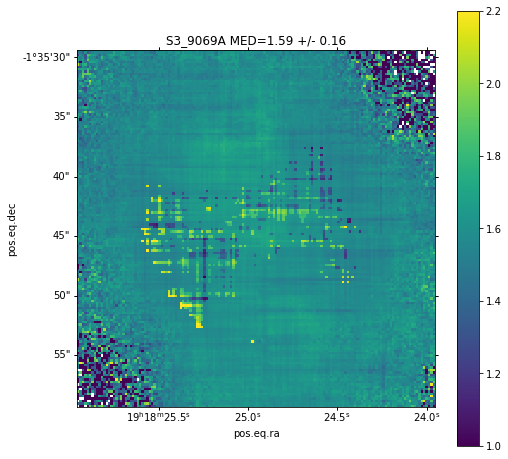

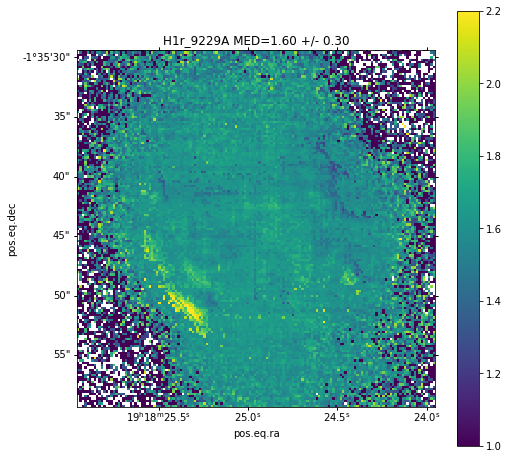

In [27]:
for line in dic:
    data = dic[line]/dic_alfa[line]
    mask = np.isfinite(data)
    med = np.median(data[mask])
    std = np.std(data[mask])
    PL.plot(data=data, title='{} MED={:.2f} +/- {:.2f}'.format(line, med, std), vmin=1.0,vmax=2.2)